## Sentiment Analysis of Tweets

In [ ]:
#!pip install wordcloud

In [1]:
import pandas as pd
import nltk
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\migue\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\migue\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
# https://www.kaggle.com/datasets/gargmanas/sentimental-analysis-for-tweets?select=sentiment_tweets3.csv
df = pd.read_csv('C:/Users/migue/Downloads/sentiment_tweets3.csv')
df.head(5)

,Index,message to examine,label (depression result)
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [3]:
len(df.index)

10314

In [4]:
df.columns

Index(['Index', 'message to examine', 'label (depression result)'], dtype='object')

In [5]:
# Se renombra las columnas
df = df.rename(columns={'message to examine': 'message', 'label (depression result)': 'label'})
df.columns

#Se mantiene solo las columnas necesarias: message y Label
df = df[['message', 'label']]
df.head(5)

,message,label
0,just had a real good moment. i missssssssss hi...,0
1,is reading manga http://plurk.com/p/mzp1e,0
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,@lapcat Need to send 'em to my accountant tomo...,0
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [6]:
# Verificación de valores nulos en el dataframe

df.isnull().sum()

message    0
label      0
dtype: int64

In [7]:
# Eliminación de duplicados

df = df.drop_duplicates()

In [8]:
# verificar los valores unicos en la columan Label

u = df["label"].unique()
print("There are {} unique values in the  column label:\n{}".format(len(u), u))

d = df[df["label"] == 1]
print(d.columns)
nd = df[df["label"] == 0]

print("There are {} persons with depression".format(len(d)))
print("There are {} persons without depression".format(len(nd)))

There are 2 unique values in the  column label:
[0 1]
Index(['message', 'label'], dtype='object')
There are 2287 persons with depression
There are 7996 persons without depression


In [15]:
# Se elimina las palabras que esten en la variable stop_words

print(df)

stop_words = set(stopwords.words('english'))

df["message"] = df["message"].apply(lambda x: " ".join([w for w in x.split() if w not in (stop_words)]))

print(df)    

                                                 message  label
0                   real good moment. missssssssss much,      0
1                 reading manga http://plurk.com/p/mzp1e      0
2      @comeagainjen http://twitpic.com/2y2lx - http:...      0
3      @lapcat Need send 'em accountant tomorrow. Odd...      0
4           ADD ME ON MYSPACE!!! myspace.com/LookThunder      0
...                                                  ...    ...
10309  No Depression G Herbo mood on, i'm done stress...      1
10310  What depression succumbs brain makes feel like...      1
10311  Ketamine Nasal Spray Shows Promise Against Dep...      1
10312     dont mistake bad day depression! everyone 'em!      1
10313                                                  0      1

[10283 rows x 2 columns]
                                                 message  label
0                   real good moment. missssssssss much,      0
1                 reading manga http://plurk.com/p/mzp1e      0
2      @comeag

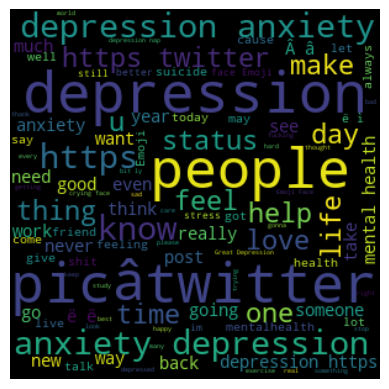

In [12]:
#Creamos la nube de palabras para depresivos
d = df[df["label"] == 1]
text1 = " ".join(tweet for tweet in d.message)
wc = WordCloud(width=300, height=300, max_words=100, repeat=True).generate(text1)

plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloudDep.png')
plt.show()


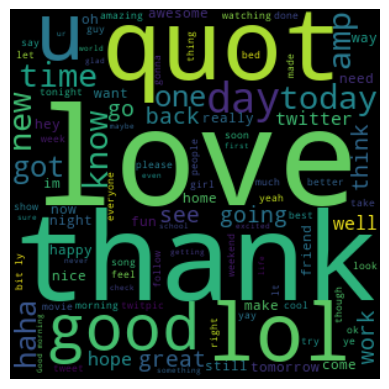

In [13]:
#Creamos la nube de palabras para no depresivos
d = df[df["label"] == 0]
text2 = " ".join(tweet for tweet in d.message)
wc2 = WordCloud(width=300, height=300, max_words=100, repeat=True).generate(text2)


plt.imshow(wc2, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloudNoDep.png')
plt.show()

Dado que se va a utilizar el modelo de regresion logistica para determinar la probabilidad de padecer depresion